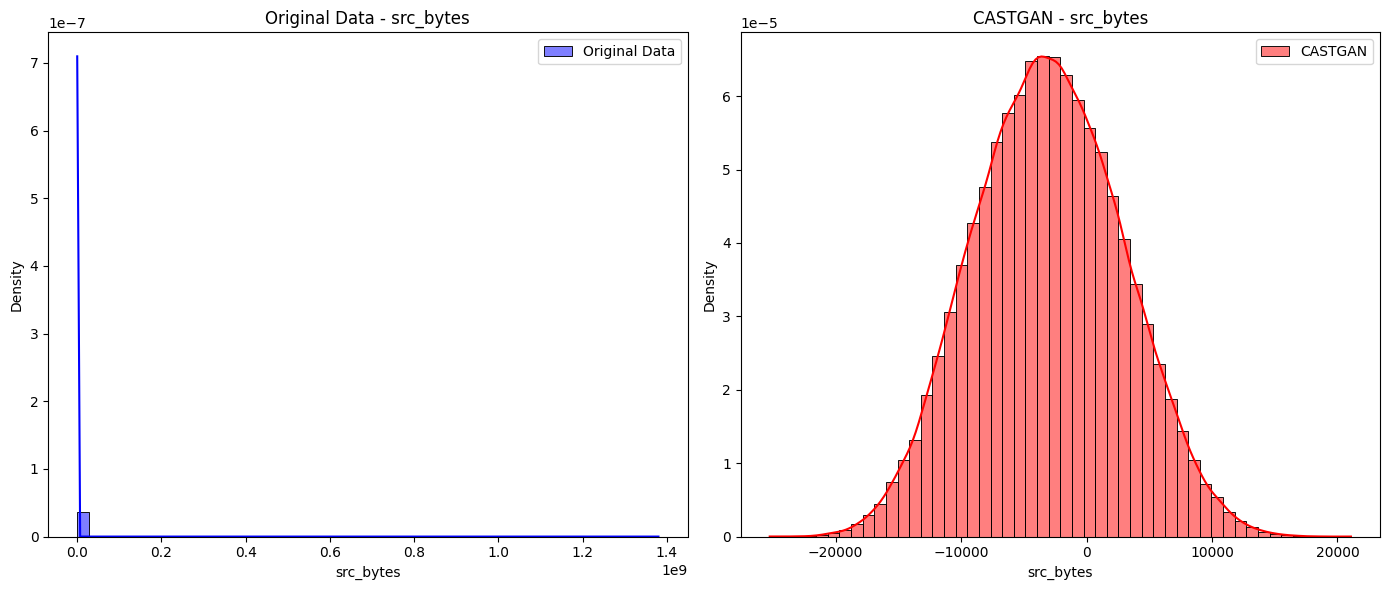

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example DataFrames (ensure these are defined correctly in your actual code)
df = pd.read_csv('imp_final_df.csv')  # Original DataFrame
data_castgan = pd.read_csv('data_castgan.csv')  # CASTGAN Synthetic DataFrame

# Plotting
plt.figure(figsize=(14, 6))

# Original Data - Histogram and KDE
plt.subplot(1, 2, 1)
sns.histplot(df['src_bytes'], kde=True, color='blue', label='Original Data', stat='density', bins=50)
plt.title('Original Data - src_bytes')
plt.xlabel('src_bytes')
plt.ylabel('Density')
plt.legend()

# CASTGAN Data - Histogram and KDE
plt.subplot(1, 2, 2)
sns.histplot(data_castgan['src_bytes'], kde=True, color='red', label='CASTGAN', stat='density', bins=50)
plt.title('CASTGAN - src_bytes')
plt.xlabel('src_bytes')
plt.ylabel('Density')
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()


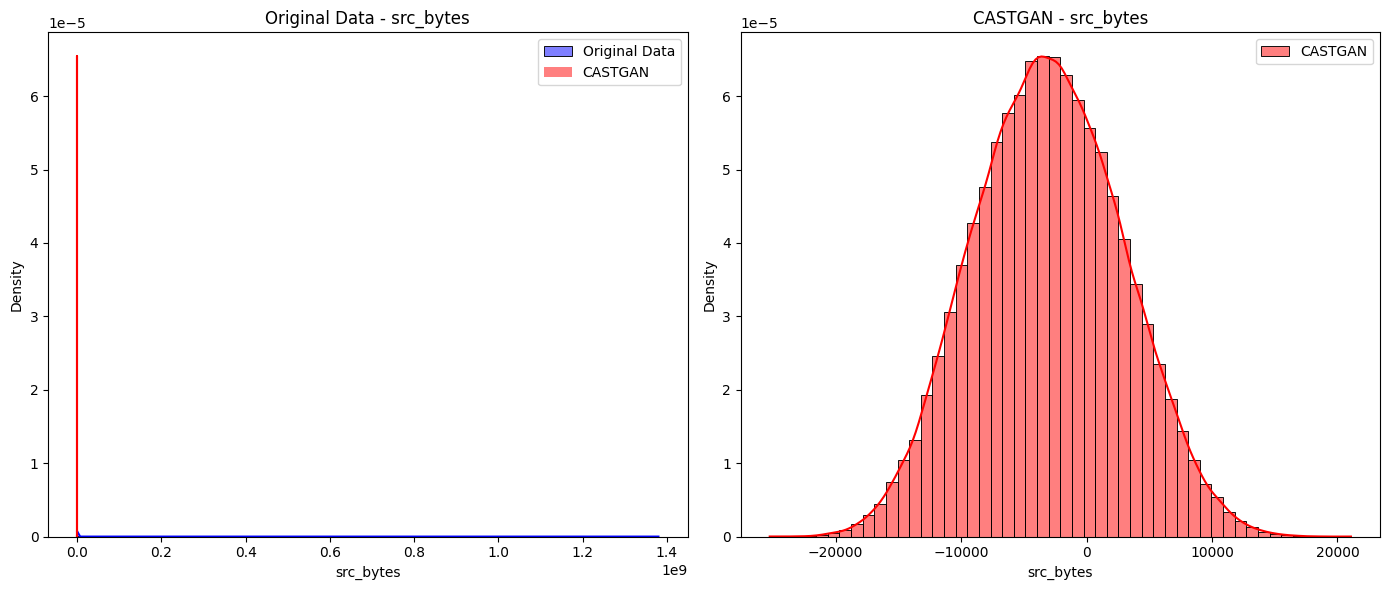

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example DataFrames (ensure these are defined correctly in your actual code)
df = pd.read_csv('imp_final_df.csv')  # Original DataFrame
data_castgan = pd.read_csv('data_castgan.csv')  # CASTGAN Synthetic DataFrame

# Plotting
plt.figure(figsize=(14, 6))

# Original Data - Histogram and KDE
plt.subplot(1, 2, 1)
sns.histplot(df['src_bytes'], kde=True, color='blue', label='Original Data', stat='density', bins=50)
sns.histplot(data_castgan['src_bytes'], kde=True, color='red', label='CASTGAN', stat='density', bins=50)

plt.title('Original Data - src_bytes')
plt.xlabel('src_bytes')
plt.ylabel('Density')
plt.legend()

# CASTGAN Data - Histogram and KDE
plt.subplot(1, 2, 2)
sns.histplot(data_castgan['src_bytes'], kde=True, color='red', label='CASTGAN', stat='density', bins=50)
plt.title('CASTGAN - src_bytes')
plt.xlabel('src_bytes')
plt.ylabel('Density')
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [4]:
data_castgan.head()

src_bytes  dst_bytes  same_srv_rate  diff_srv_rate  flag_SF  \
0       2949     -10144       0.998091      -0.000259     True   
1      -9947      -5026       0.998359      -0.000837     True   
2      -9625      -1744       0.097352       0.083104     True   
3       1718      -4454       0.997418      -0.001029     True   
4     -12353        762       1.006028       0.000689     True   

   dst_host_srv_count  dst_host_same_srv_rate  logged_in  \
0                 252                1.000233          1   
1                 252                1.005390          0   
2                 251                0.125089          0   
3                  24                0.999555          0   
4                  28                0.991277          0   

   dst_host_serror_rate  dst_host_diff_srv_rate  ...  \
0             -0.002835               -0.002221  ...   
1              0.000064               -0.000089  ...   
2             -0.000744                0.070955  ...   
3             -0.001780                0.029461  ...   
4              0.001197                0.021478  ...   

   dst_host_srv_diff_host_rate  level  dst_host_count  \
0                     0.024957     20              96   
1                     0.032683     21              39   
2                     0.000180     17             254   
3                     0.002039     17             256   
4                     0.037959     19               0   

   dst_host_same_src_port_rate  service_private  srv_diff_host_rate  \
0                     0.011648            False            0.004272   
1                     0.027538            False            0.005122   
2                    -0.000811            False            0.972419   
3                     0.183254            False            0.003544   
4                     0.988473            False            1.040712   

   srv_count  dst_host_srv_rerror_rate  service_domain_u  target  
0         37                  0.000164             False       0  
1         14                 -0.000137              True       0  
2         22                 -0.000322              True       0  
3         29                  0.001835              True       0  
4          0                 -0.000963             False       1  

[5 rows x 26 columns]

In [5]:
df.head()

src_bytes  dst_bytes  same_srv_rate  diff_srv_rate  flag_SF  \
0        491          0           1.00           0.00     True   
1        146          0           0.08           0.15     True   
2          0          0           0.05           0.07    False   
3        232       8153           1.00           0.00     True   
4        199        420           1.00           0.00     True   

   dst_host_srv_count  dst_host_same_srv_rate  logged_in  \
0                  25                    0.17          0   
1                   1                    0.00          0   
2                  26                    0.10          0   
3                 255                    1.00          1   
4                 255                    1.00          1   

   dst_host_serror_rate  dst_host_diff_srv_rate  ...  \
0                  0.00                    0.03  ...   
1                  0.00                    0.60  ...   
2                  1.00                    0.05  ...   
3                  0.03                    0.00  ...   
4                  0.00                    0.00  ...   

   dst_host_srv_diff_host_rate  level  dst_host_count  \
0                         0.00     20             150   
1                         0.00     15             255   
2                         0.00     19             255   
3                         0.04     21              30   
4                         0.00     21             255   

   dst_host_same_src_port_rate  service_private  srv_diff_host_rate  \
0                         0.17            False                0.00   
1                         0.88            False                0.00   
2                         0.00             True                0.00   
3                         0.03            False                0.00   
4                         0.00            False                0.09   

   srv_count  dst_host_srv_rerror_rate  service_domain_u  target  
0          2                      0.00             False       0  
1          1                      0.00             False       0  
2          6                      0.00             False       1  
3          5                      0.01             False       0  
4         32                      0.00             False       0  

[5 rows x 26 columns]

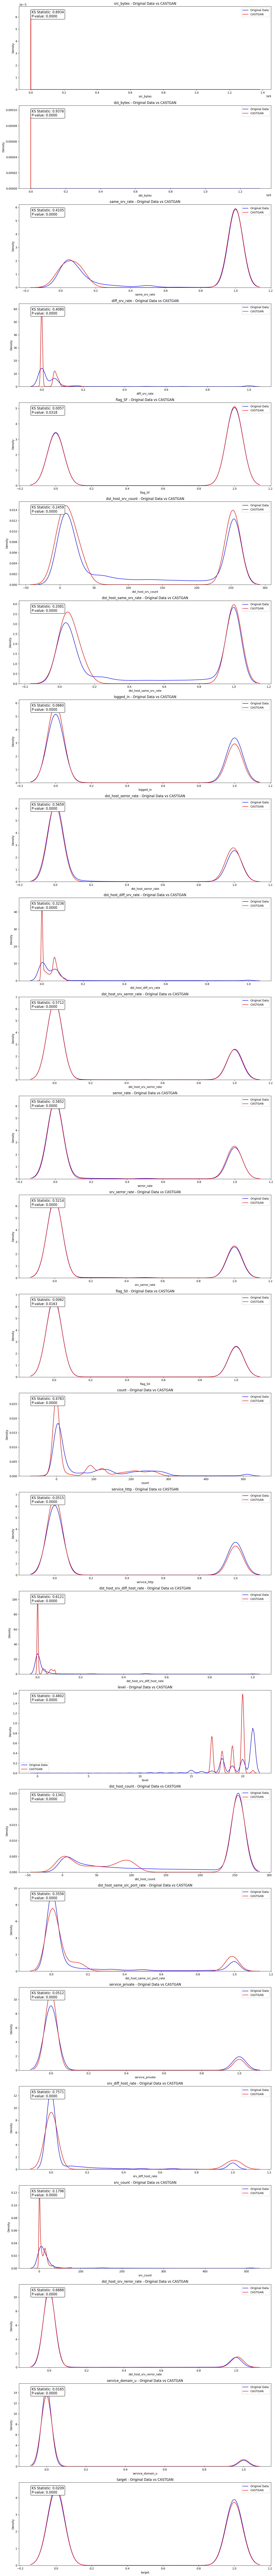

In [6]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example DataFrames (ensure these are defined correctly in your actual code)
df = pd.read_csv('imp_final_df.csv')  # Original DataFrame
data_castgan = pd.read_csv('data_castgan.csv')  # CASTGAN Synthetic DataFrame

# List of features (column names)
features = df.columns

# Create a figure with subplots
num_features = len(features)
fig, axes = plt.subplots(num_features, 1, figsize=(14, 5 * num_features), sharex=False, sharey=False)

for i, feature in enumerate(features):
    # Perform KS test
    ks_statistic, p_value = stats.ks_2samp(df[feature], data_castgan[feature])

    # Plot KDE for the original data
    sns.kdeplot(df[feature], color='blue', label='Original Data', ax=axes[i])

    # Plot KDE for the CASTGAN data
    sns.kdeplot(data_castgan[feature], color='red', label='CASTGAN', ax=axes[i])

    # Customize each subplot
    axes[i].set_title(f'{feature} - Original Data vs CASTGAN')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')
    axes[i].legend()

    # Annotate with KS statistic and p-value
    axes[i].text(0.05, 0.95, f'KS Statistic: {ks_statistic:.4f}\nP-value: {p_value:.4f}',
                 transform=axes[i].transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

# Adjust layout
plt.tight_layout()
plt.show()


In [8]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


df = pd.read_csv('imp_final_df.csv')  # Original DataFrame
data_ctgan = pd.read_csv('data_ctgan.csv')  
data_ganblrpp = pd.read_csv('data_ganblrpp.csv')  
data_copulagan = pd.read_csv('data_copula_gan.csv')
data_castgan = pd.read_csv('data_castgan.csv')

# List of features (column names)
features = df.columns

# List of synthetic dataframes and their titles
synthetic_datasets = [data_ctgan, data_ganblrpp, data_copulagan, data_castgan]
titles = ["CTGAN", "GANBLR++", "COPULA GAN", "CASTGAN"]

# Create a figure with subplots
num_features = len(features)
num_datasets = len(synthetic_datasets)
fig, axes = plt.subplots(num_features, num_datasets, figsize=(14 * num_datasets, 5 * num_features), sharex=False, sharey=False)

for i, feature in enumerate(features):
    for j, (synthetic_data, title) in enumerate(zip(synthetic_datasets, titles)):
        # Perform KS test
        ks_statistic, p_value = stats.ks_2samp(df[feature], synthetic_data[feature])
        
        # Plot KDE for the original data
        sns.kdeplot(df[feature], color='blue', label='Original Data', ax=axes[i, j])
        
        # Plot KDE for the synthetic data
        sns.kdeplot(synthetic_data[feature], color='red', label=title, ax=axes[i, j])
        
        # Customize each subplot
        axes[i, j].set_title(f'{feature} - Original Data vs {title}')
        axes[i, j].set_xlabel(feature)
        axes[i, j].set_ylabel('Density')
        axes[i, j].legend()
        
        # Annotate with KS statistic and p-value
        #axes[i, j].text(0.05, 0.95, f'KS Statistic: {ks_statistic:.4f}\nP-value: {p_value:.4f}',
         #               transform=axes[i, j].transAxes, fontsize=12, verticalalignment='top', 
          #              bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

# Adjust layout
plt.tight_layout()
plt.show()


C:\Users\USTB\AppData\Local\Temp\ipykernel_19384\1666655669.py:35: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(synthetic_data[feature], color='red', label=title, ax=axes[i, j])


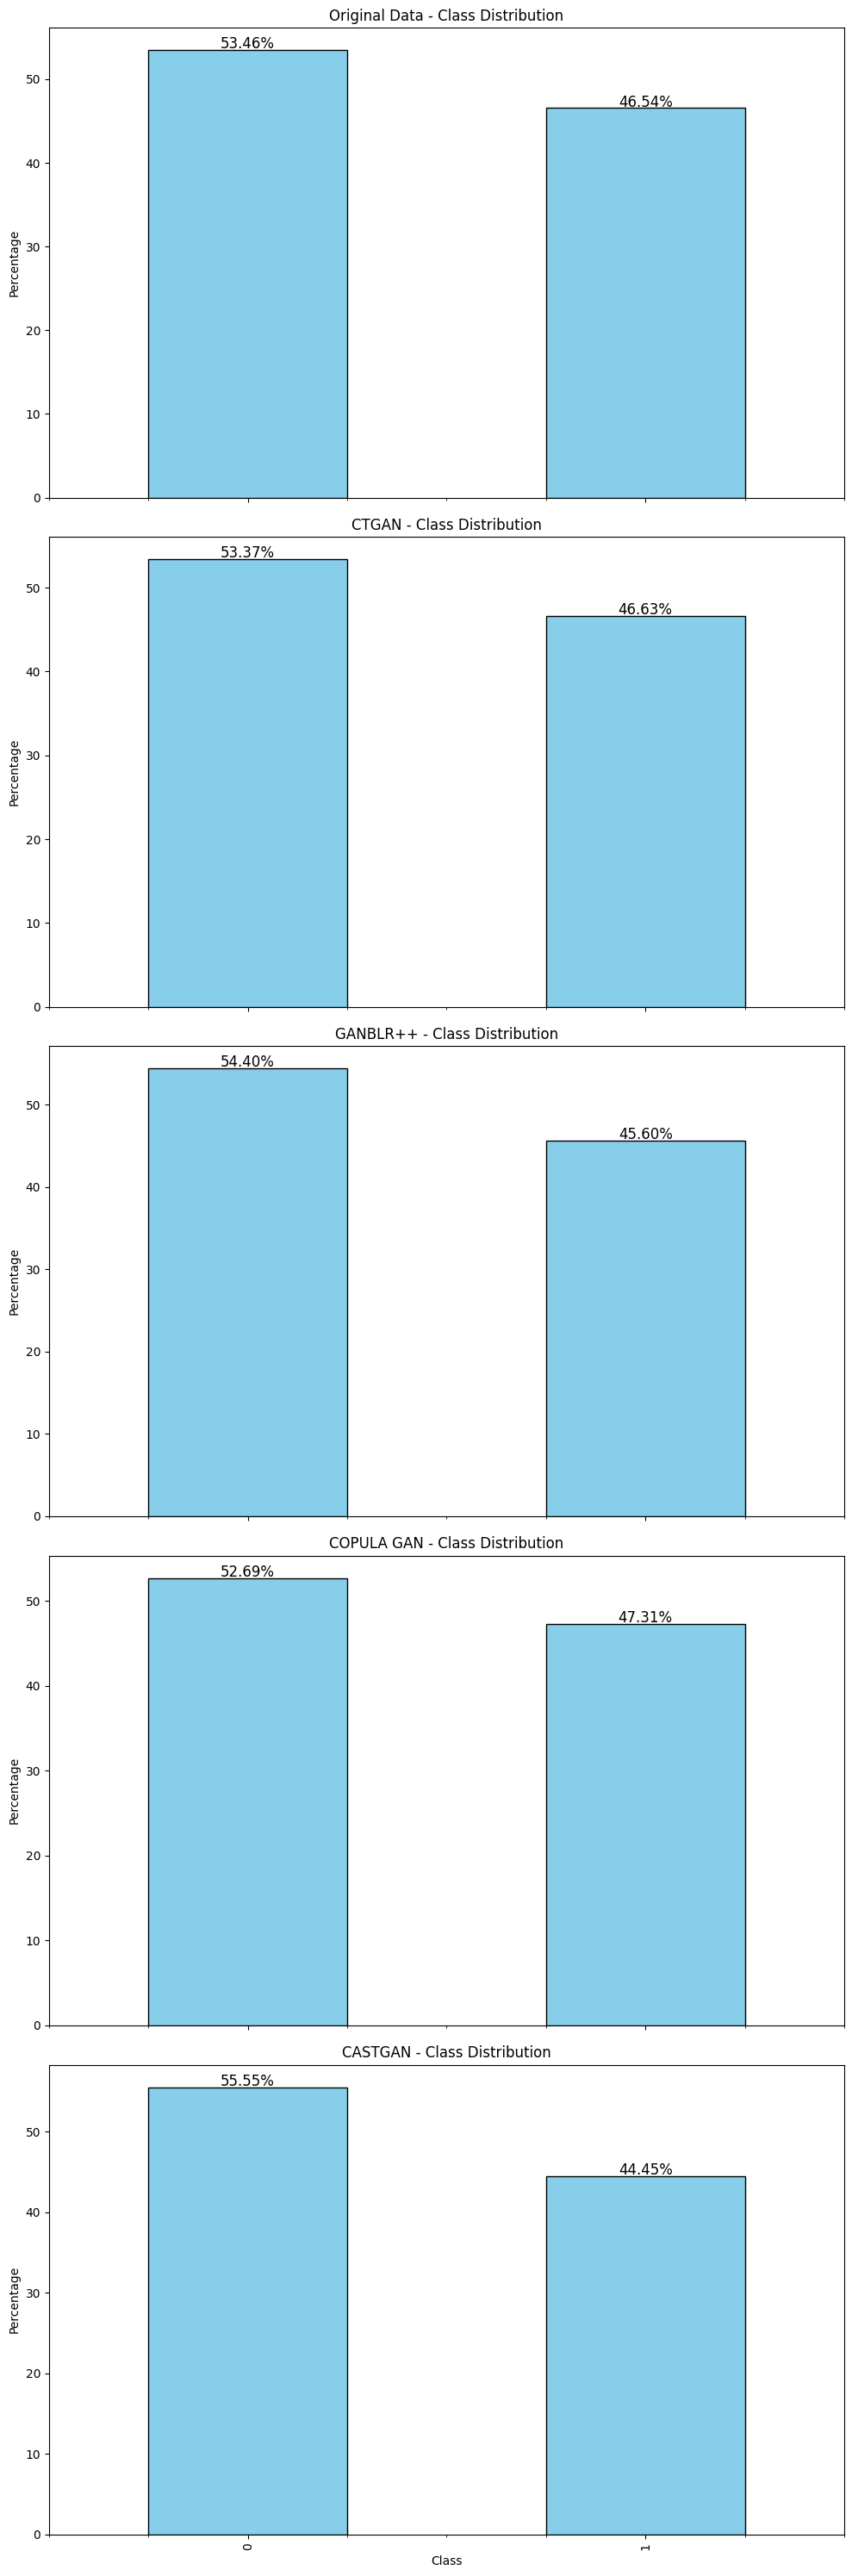


Original Data - Class Proportions:
target
0    53.458281
1    46.541719
Name: proportion, dtype: float64

CTGAN - Class Proportions:
target
0    53.366198
1    46.633802
Name: proportion, dtype: float64

GANBLR++ - Class Proportions:
target
0    54.4
1    45.6
Name: proportion, dtype: float64

COPULA GAN - Class Proportions:
target
0    52.693831
1    47.306169
Name: proportion, dtype: float64

CASTGAN - Class Proportions:
target
0    55.551586
1    44.448414
Name: proportion, dtype: float64


In [9]:
import pandas as pd
import matplotlib.pyplot as plt



# List of DataFrames and their titles
datasets = [df, data_ctgan, data_ganblrpp, data_copulagan, data_castgan]
titles = ["Original Data", "CTGAN", "GANBLR++", "COPULA GAN", "CASTGAN"]

# Target column name (replace 'target' with your actual target column name)
target_column = 'target'

# Plotting class distribution
fig, axes = plt.subplots(len(datasets), 1, figsize=(10, 6 * len(datasets)), sharex=True)

for i, (data, title) in enumerate(zip(datasets, titles)):
    class_counts = data[target_column].value_counts(normalize=True) * 100  # Get class distribution in percentage
    class_counts.plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')
    
    # Annotate the bars with percentage values
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), 
                         textcoords='offset points')
    
    axes[i].set_title(f'{title} - Class Distribution')
    axes[i].set_xlabel('Class')
    axes[i].set_ylabel('Percentage')

# Adjust layout
plt.tight_layout()
plt.show()

# Print the proportions numerically
for data, title in zip(datasets, titles):
    print(f"\n{title} - Class Proportions:")
    class_counts = data[target_column].value_counts(normalize=True) * 100
    print(class_counts)


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# List of DataFrames and their titles
datasets = [data_ctgan, data_ganblrpp, data_copulagan, data_castgan]
titles = ["CTGAN", "GANBLR++", "COPULA GAN", "CASTGAN"]

# Target column name (replace 'target' with your actual target column name)
target_column = 'target'

# Features and target for the original dataset
X_real = df.drop(columns=[target_column])
y_real = df[target_column]

# Split the original data into train and test sets
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_real, y_real, test_size=0.3, random_state=42)

# Train and test on real data (TRTR)
model_real = RandomForestClassifier(random_state=42)
model_real.fit(X_train_real, y_train_real)
y_pred_real = model_real.predict(X_test_real)
accuracy_real = accuracy_score(y_test_real, y_pred_real)
print(f'TRTR (Train and Test on Real) Accuracy: {accuracy_real:.4f}')

# Train on synthetic data and test on real data (TSTR)
accuracies = {}

for data, title in zip(datasets, titles):
    X_synth = data.drop(columns=[target_column])
    y_synth = data[target_column]
    
    model_synth = RandomForestClassifier(random_state=42)
    model_synth.fit(X_synth, y_synth)  # Train on synthetic data
    y_pred_synth = model_synth.predict(X_test_real)  # Test on real data
    accuracy_synth = accuracy_score(y_test_real, y_pred_synth)
    accuracies[title] = accuracy_synth
    print(f'TSTR (Train on {title}, Test on Real) Accuracy: {accuracy_synth:.4f}')

# Compare accuracies
comparison_df = pd.DataFrame({'Dataset': ['TRTR'] + titles, 'Accuracy': [accuracy_real] + list(accuracies.values())})
print('\nAccuracy Comparison:')
print(comparison_df)


TRTR (Train and Test on Real) Accuracy: 0.9995
TSTR (Train on CTGAN, Test on Real) Accuracy: 0.9667
TSTR (Train on GANBLR++, Test on Real) Accuracy: 0.5916
TSTR (Train on COPULA GAN, Test on Real) Accuracy: 0.9761
TSTR (Train on CASTGAN, Test on Real) Accuracy: 0.9582

Accuracy Comparison:
      Dataset  Accuracy
0        TRTR  0.999497
1       CTGAN  0.966739
2    GANBLR++  0.591607
3  COPULA GAN  0.976106
4     CASTGAN  0.958245


In [11]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


df = pd.read_csv('imp_final_df.csv')  # Original DataFrame
data_ctgan = pd.read_csv('data_ctgan.csv')  
data_ganblrpp = pd.read_csv('data_ganblrpp.csv')  
data_copulagan = pd.read_csv('data_copula_gan.csv')
data_castgan = pd.read_csv('data_castgan.csv')

In [14]:
df.head()

src_bytes  dst_bytes  same_srv_rate  diff_srv_rate  flag_SF  \
0       2949     -10144       0.998091      -0.000259     True   
1      -9947      -5026       0.998359      -0.000837     True   
2      -9625      -1744       0.097352       0.083104     True   
3       1718      -4454       0.997418      -0.001029     True   
4     -12353        762       1.006028       0.000689     True   

   dst_host_srv_count  dst_host_same_srv_rate  logged_in  \
0                 252                1.000233          1   
1                 252                1.005390          0   
2                 251                0.125089          0   
3                  24                0.999555          0   
4                  28                0.991277          0   

   dst_host_serror_rate  dst_host_diff_srv_rate  ...  \
0             -0.002835               -0.002221  ...   
1              0.000064               -0.000089  ...   
2             -0.000744                0.070955  ...   
3             -0.001780                0.029461  ...   
4              0.001197                0.021478  ...   

   dst_host_srv_diff_host_rate  level  dst_host_count  \
0                     0.024957     20              96   
1                     0.032683     21              39   
2                     0.000180     17             254   
3                     0.002039     17             256   
4                     0.037959     19               0   

   dst_host_same_src_port_rate  service_private  srv_diff_host_rate  \
0                     0.011648            False            0.004272   
1                     0.027538            False            0.005122   
2                    -0.000811            False            0.972419   
3                     0.183254            False            0.003544   
4                     0.988473            False            1.040712   

   srv_count  dst_host_srv_rerror_rate  service_domain_u  target  
0         37                  0.000164             False       0  
1         14                 -0.000137              True       0  
2         22                 -0.000322              True       0  
3         29                  0.001835              True       0  
4          0                 -0.000963             False       1  

[5 rows x 26 columns]

In [20]:

# List of synthetic dataframes and their titles
datasets = [df,data_ctgan, data_ganblrpp, data_copulagan, data_castgan]
titles = ["Original","CTGAN", "GANBLR++", "COPULA GAN", "CASTGAN"]

for title, df in zip(titles, datasets):
    print(f"Dataset: {title}")
    print("Column-wise Min and Max values:")
    
    # Display the minimum values for each column
    print("Minimum values:")
    print(df.min())

    # Display the maximum values for each column
    print("\nMaximum values:")
    print(df.max())
    
    print("\n" + "="*50 + "\n")  # Add a separator between datasets for better readability


Dataset: Original
Column-wise Min and Max values:
Minimum values:
src_bytes                          0
dst_bytes                          0
same_srv_rate                    0.0
diff_srv_rate                    0.0
flag_SF                        False
dst_host_srv_count                 0
dst_host_same_srv_rate           0.0
logged_in                          0
dst_host_serror_rate             0.0
dst_host_diff_srv_rate           0.0
dst_host_srv_serror_rate         0.0
serror_rate                      0.0
srv_serror_rate                  0.0
flag_S0                        False
count                              0
service_http                   False
dst_host_srv_diff_host_rate      0.0
level                              0
dst_host_count                     0
dst_host_same_src_port_rate      0.0
service_private                False
srv_diff_host_rate               0.0
srv_count                          0
dst_host_srv_rerror_rate         0.0
service_domain_u               False
target   

In [16]:
df = pd.read_csv('imp_final_df.csv')

In [17]:
df.head()

src_bytes  dst_bytes  same_srv_rate  diff_srv_rate  flag_SF  \
0        491          0           1.00           0.00     True   
1        146          0           0.08           0.15     True   
2          0          0           0.05           0.07    False   
3        232       8153           1.00           0.00     True   
4        199        420           1.00           0.00     True   

   dst_host_srv_count  dst_host_same_srv_rate  logged_in  \
0                  25                    0.17          0   
1                   1                    0.00          0   
2                  26                    0.10          0   
3                 255                    1.00          1   
4                 255                    1.00          1   

   dst_host_serror_rate  dst_host_diff_srv_rate  ...  \
0                  0.00                    0.03  ...   
1                  0.00                    0.60  ...   
2                  1.00                    0.05  ...   
3                  0.03                    0.00  ...   
4                  0.00                    0.00  ...   

   dst_host_srv_diff_host_rate  level  dst_host_count  \
0                         0.00     20             150   
1                         0.00     15             255   
2                         0.00     19             255   
3                         0.04     21              30   
4                         0.00     21             255   

   dst_host_same_src_port_rate  service_private  srv_diff_host_rate  \
0                         0.17            False                0.00   
1                         0.88            False                0.00   
2                         0.00             True                0.00   
3                         0.03            False                0.00   
4                         0.00            False                0.09   

   srv_count  dst_host_srv_rerror_rate  service_domain_u  target  
0          2                      0.00             False       0  
1          1                      0.00             False       0  
2          6                      0.00             False       1  
3          5                      0.01             False       0  
4         32                      0.00             False       0  

[5 rows x 26 columns]